<a href="https://colab.research.google.com/github/tareq-alomari/NLP/blob/main/spamAndHamNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data (Spam vs. Ham) Using Neural Network
# **By Tareq Alomari**

  label                                            message
0   ham  I've been searching for the right words to tha...
1  spam  Free entry in 2 a wkly comp to win FA Cup fina...
2   ham  Nah I don't think he goes to usf, he lives aro...
3   ham  Even my brother is not like to speak with me. ...
4   ham                I HAVE A DATE ON SUNDAY WITH WILL!!


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8508 - loss: 0.5684 - val_accuracy: 0.9039 - val_loss: 0.2136
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9506 - loss: 0.1459 - val_accuracy: 0.9811 - val_loss: 0.0768
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9936 - loss: 0.0335 - val_accuracy: 0.9829 - val_loss: 0.0587
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9982 - loss: 0.0117 - val_accuracy: 0.9829 - val_loss: 0.0552
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9991 - loss: 0.0055 - val_accuracy: 0.9829 - val_loss: 0.0578
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 0.9829 - val_loss: 0.0579
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9829 - val_loss: 0.0594
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9829 - val_los

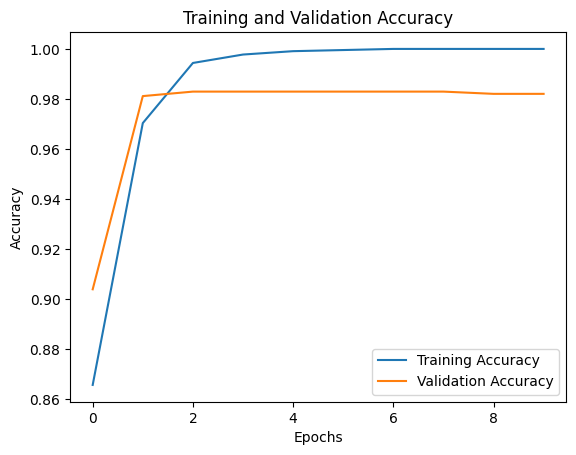

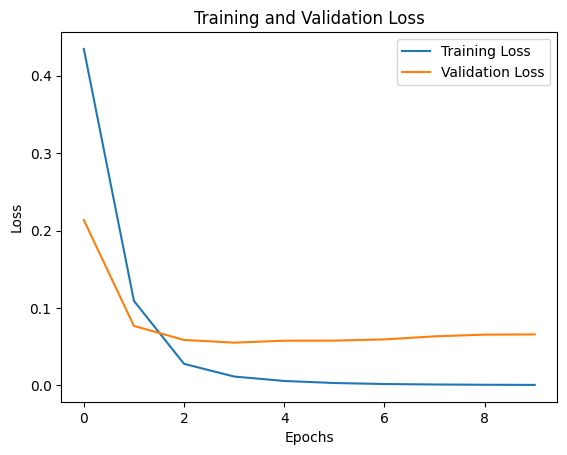

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9821 - loss: 0.0641
Test Accuracy: 98.20%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted label: spam
Final Test Accuracy: 98.20%
Best Training Accuracy: 100.00%
Best Validation Accuracy: 98.29%


<ipython-input-4-9d7015687dad>:71: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = label_encoder.inverse_transform([int(prediction[0] > 0.5)])


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. تحميل البيانات من ملف CSV
data = pd.read_csv('/content/drive/MyDrive/SMSSpamCollection.csv',sep='\t', header=None, names=['label', 'message'])

# إلقاء نظرة على البيانات
print(data.head())

# 2. تحويل النصوص إلى تمثيل رقمي باستخدام Bag of Words (BoW)
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(data['message'])

# 3. أو يمكنك استخدام TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(data['message'])

# 4. تحويل التصنيفات إلى قيم رقمية
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label'])

# 5. تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 6. بناء وتدريب نموذج الشبكة العصبية (Neural Network)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # الطبقة المخفية
model.add(Dense(32, activation='relu'))  # طبقة مخفية إضافية
model.add(Dense(1, activation='sigmoid'))  # طبقة إخراج لتصنيف binary (Spam or Ham)

# تجميع النموذج
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# تدريب النموذج مع حفظ تاريخ التدريب
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# 7. تمثيل النتائج باستخدام Matplotlib
# رسم دقة التدريب و التحقق (validation) خلال الحقب (epochs)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# رسم الخسارة (loss) خلال الحقب (epochs)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 8. تقييم النموذج على مجموعة الاختبار
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 9. التنبؤ مع النموذج
message = ["Congratulations! You've won a free lottery ticket!"]
message_tfidf = vectorizer_tfidf.transform(message)  # تحويل النص إلى تمثيل TF-IDF

# التنبؤ باستخدام النموذج
prediction = model.predict(message_tfidf)
predicted_label = label_encoder.inverse_transform([int(prediction[0] > 0.5)])

print(f"Predicted label: {predicted_label[0]}")

# طباعة الدقة النهائية على مجموعة الاختبار
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

# طباعة أفضل دقة تم تحقيقها أثناء التدريب
best_train_accuracy = max(history.history['accuracy'])
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Best Training Accuracy: {best_train_accuracy * 100:.2f}%")
print(f"Best Validation Accuracy: {best_val_accuracy * 100:.2f}%")


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


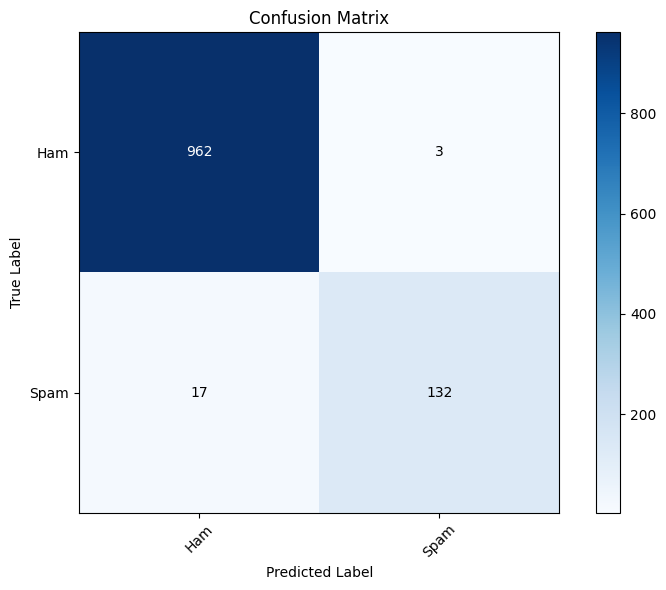

Accuracy for the last epoch: 98.20%


In [9]:
# prompt: make Accurcy and confution matrix for last and reprcent data by matpoltlib

import numpy as np
from sklearn.metrics import confusion_matrix

# ... (Your existing code) ...

# 10.  Confusion Matrix and Accuracy for the last epoch
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)  # Assuming binary classification (0 and 1)
plt.xticks(tick_marks, ['Ham', 'Spam'], rotation=45)
plt.yticks(tick_marks, ['Ham', 'Spam'])

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


# Calculate and print the accuracy for the last epoch
last_epoch_accuracy = history.history['val_accuracy'][-1]
print(f"Accuracy for the last epoch: {last_epoch_accuracy * 100:.2f}%")


#Representing the data
# Assuming 'y_pred' contains your predictions and 'y_test' contains true labels
#Already plotted the last epoch above
